In [ ]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import os
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import zipfile
import math
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
import shutil

In [ ]:
device = torch.device ("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/gdrive/MyDrive/Capstone_2/PAD_Classified.zip" -d "/content/skin-images"

unzip:  cannot find or open /content/gdrive/MyDrive/Capstone_2/PAD_Classified.zip, /content/gdrive/MyDrive/Capstone_2/PAD_Classified.zip.zip or /content/gdrive/MyDrive/Capstone_2/PAD_Classified.zip.ZIP.


In [ ]:
# path1="/content/skin-images/PAD_Classified/Seborrheic_Keratosis/SEK"
# path2="/content/skin-images/PAD_Classified/Squamous_Cell_Carcinoma/SCC"
path3="/content/skin-images/PAD_Classified/ACK"
path4="/content/skin-images/PAD_Classified/BCC"
path5="/content/skin-images/PAD_Classified/MEL"
path6="/content/skin-images/PAD_Classified/NEV"
# shutil.move (path1, "/content/dataset/SEK" )
# shutil.move (path2, "/content/dataset/SCC" )
shutil.move (path3, "/content/dataset/ACK" )
shutil.move (path4, "/content/dataset/BCC" )
shutil.move (path5, "/content/dataset/MEL" )
shutil.move (path6, "/content/dataset/NEV" )

FileNotFoundError: [Errno 2] No such file or directory: '/content/skin-images/PAD_Classified/ACK'

In [ ]:
!unzip "/content/drive/MyDrive/Capstone/actinic_keratosis.zip" -d "/content/skin-images"
!unzip "/content/drive/MyDrive/Capstone/basal_cell_carcinoma.zip" -d "/content/skin-images"
!unzip "/content/drive/MyDrive/Capstone/melanocytic nevus.zip" -d "/content/skin-images"
!unzip "/content/drive/MyDrive/Capstone/melanoma.zip" -d "/content/skin-images"

In [ ]:
shutil.move ("/content/skin-images/akiec_aug", "/content/dataset/ACK" )
shutil.move ("/content/skin-images/bcc_aug", "/content/dataset/BCC" )
shutil.move ("/content/skin-images/mel_aug", "/content/dataset/MEL" )
shutil.move ("/content/skin-images/nv_aug", "/content/dataset/NEV" )

In [ ]:
#HYPERPARAMETERS

batch_size = 32
num_epochs = 10

In [ ]:
transformer=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
])

In [ ]:
dataset_path = '/content/dataset'

def load_dataset():
    train_dataset_manual = torchvision.datasets.ImageFolder(dataset_path, transform=transformer)
    train_loader_manual = torch.utils.data.DataLoader(train_dataset_manual)
    return train_loader_manual


full_dataset = load_dataset()


train_size = int(0.6 * len(full_dataset))
test_size = int (0.2 * len(full_dataset))
valid_size = len(full_dataset) - train_size - test_size


train_dataset, test_dataset, valid_dataset = torch.utils.data.random_split(full_dataset.dataset, [train_size, test_size, valid_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=0, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=0, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=0, shuffle=True)

print('Full Dataset - ' + str(len(full_dataset)) + ' images.')
print('Train Set- ' + str(train_size) + ' images in ' + str(len(train_loader)) +' batches')
print('Testing Set - ' + str(test_size) + ' images in ' + str(len(test_loader)) + ' batches' )
print('Validation Set - ' + str(valid_size) + ' images in ' + str(len(valid_loader)) + ' batches')

train_count = train_size
test_count = test_size
valid_count = valid_size

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset'

In [ ]:

# Define the augmentation pipeline
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.ToTensor(),
])

# Load the dataset
train_dataset = datasets.ImageFolder(
    root=dataset_path,
    transform=train_transforms
)

# Print the number of samples in the augmented dataset
print(f"Number of samples in the augmented dataset: {len(train_dataset)}")

Number of samples in the augmented dataset: 7871


In [ ]:
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([32, 3, 224, 224])
Image label dimensions: torch.Size([32])


In [ ]:
root = pathlib.Path (dataset_path)
classes = sorted ([j.name.split('/')[-1] for j in root.iterdir()])
print (classes)
print(len(classes))

['ACK', 'BCC', 'MEL', 'NEV']
4


In [ ]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

In [ ]:
device = torch.device ("cuda" if torch.cuda.is_available() else "cpu")
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0').to(device)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 220MB/s]


Loaded pretrained weights for efficientnet-b0


In [ ]:
model._fc = nn.Linear(in_features=model._fc.in_features, out_features=4, bias=True)

In [ ]:
from torchsummary import summary
model=model.to(device)
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1          [-1, 3, 225, 225]               0
Conv2dStaticSamePadding-2         [-1, 32, 112, 112]             864
       BatchNorm2d-3         [-1, 32, 112, 112]              64
MemoryEfficientSwish-4         [-1, 32, 112, 112]               0
         ZeroPad2d-5         [-1, 32, 114, 114]               0
Conv2dStaticSamePadding-6         [-1, 32, 112, 112]             288
       BatchNorm2d-7         [-1, 32, 112, 112]              64
MemoryEfficientSwish-8         [-1, 32, 112, 112]               0
          Identity-9             [-1, 32, 1, 1]               0
Conv2dStaticSamePadding-10              [-1, 8, 1, 1]             264
MemoryEfficientSwish-11              [-1, 8, 1, 1]               0
         Identity-12              [-1, 8, 1, 1]               0
Conv2dStaticSamePadding-13             [-1, 32, 1, 1]             288
         I

In [ ]:
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()

In [ ]:
 epoch_list = []
 train_accuracy_list = []
 val_loss_list = []
 val_accuracy_list = []
 train_loss_list = []

In [ ]:
 for epoch in range(10):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [1], Train Loss: 0.6632, Train Acc: 0.7374, Val Loss: 5.9671, Val Acc: 0.2052
Epoch [2], Train Loss: 0.4131, Train Acc: 0.8407, Val Loss: 1.0432, Val Acc: 0.5750
Epoch [3], Train Loss: 0.3091, Train Acc: 0.8846, Val Loss: 0.7872, Val Acc: 0.7078
Epoch [4], Train Loss: 0.2609, Train Acc: 0.9062, Val Loss: 0.6820, Val Acc: 0.7808
Epoch [5], Train Loss: 0.1940, Train Acc: 0.9329, Val Loss: 0.7810, Val Acc: 0.7122
Epoch [6], Train Loss: 0.1694, Train Acc: 0.9388, Val Loss: 1.6451, Val Acc: 0.5648
Epoch [7], Train Loss: 0.1380, Train Acc: 0.9502, Val Loss: 0.7193, Val Acc: 0.7681
Epoch [8], Train Loss: 0.1081, Train Acc: 0.9634, Val Loss: 0.7806, Val Acc: 0.7929
Epoch [9], Train Loss: 0.1269, Train Acc: 0.9564, Val Loss: 1.0749, Val Acc: 0.6677
Epoch [10], Train Loss: 0.0932, Train Acc: 0.9704, Val Loss: 0.5778, Val Acc: 0.8253


In [ ]:
 for epoch in range(15,16):
    train_loss = 0.0
    train_correct = 0.0
    train_total = 0.0
    val_loss = 0.0
    val_correct = 0.0
    val_total = 0.0

    # Train the model
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels=inputs.to(device),labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Compute training loss
        train_loss += loss.item()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Compute validation
            val_loss += loss.item()

    # Compute average training loss and accuracy
    train_loss /= len(train_loader)
    train_accuracy = train_correct / train_total
    epoch_list.append(epoch)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Compute average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    # Print the loss and accuracy values for each epoch
    print('Epoch [%d], Train Loss: %.4f, Train Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
                    % (epoch + 1, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch [16], Train Loss: 0.0926, Train Acc: 0.9678, Val Loss: 0.5441, Val Acc: 0.8227


In [ ]:
import torch
torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_accuracy': val_accuracy,
            'val_loss': val_loss,
            'train_accuracy': train_accuracy,
            'train_loss': train_loss,
        }, '/content/drive/MyDrive/New_Dataset/EfficientNetB0')

In [ ]:
print(train_accuracy_list)
print(train_loss_list)
print(val_accuracy_list)
print(val_loss_list)
print(epoch_list)

[0.7191867852604829, 0.8398983481575604, 0.8867005506141465, 0.9180432020330368, 0.9339263024142312, 0.936255823803473, 0.9440914866581956, 0.9512918254976704, 0.9699279966116052, 0.9608216857263872, 0.9718339686573486, 0.9627276577721304, 0.9714104193138501, 0.9750105887335875, 0.9616687844133842, 0.9678102498941127]
[0.6833948960175386, 0.4140702051085395, 0.3058444429188967, 0.2279822336056748, 0.17845410785662966, 0.1714490364821678, 0.15852416335995234, 0.1358293098888385, 0.08878213346218439, 0.10795209337831349, 0.08658764315328586, 0.10822569465302434, 0.0881158450659289, 0.0740754406952702, 0.10035340694043585, 0.0925623147899436]
[0.22808132147395171, 0.3341804320203304, 0.5997458703939009, 0.7198221092757306, 0.735705209656925, 0.7871664548919949, 0.6238881829733164, 0.820838627700127, 0.7681067344345617, 0.6734434561626429, 0.7395171537484116, 0.8303684879288437, 0.829733163913596, 0.752858958068615, 0.7681067344345617, 0.8227445997458704]
[1.8202555131912233, 1.85651251792

In [ ]:
epoch_list=[1,2,3,4,5,6,7,8,9,10,11, 12, 13, 14,15]
val_accuracy_list=[0.22808132147395171, 0.3341804320203304, 0.5997458703939009, 0.7198221092757306, 0.735705209656925, 0.7871664548919949, 0.6238881829733164, 0.820838627700127, 0.7681067344345617, 0.6734434561626429, 0.7395171537484116, 0.8303684879288437, 0.829733163913596, 0.752858958068615, 0.8227445997458704]
val_loss_list=[1.8202555131912233, 1.8565125179290771, 1.3635431134700775, 0.9252316969633102, 1.087427025437355, 0.7707897138595581, 1.4774425029754639, 0.5588494038581848, 0.8028169804811478, 1.014388828277588, 0.9064255297183991, 0.51438278734684, 0.7138578298687935, 0.7157884855568409, 0.5441009951941669]
train_accuracy_list=[0.7191867852604829, 0.8398983481575604, 0.8867005506141465, 0.9180432020330368, 0.9339263024142312, 0.936255823803473, 0.9440914866581956, 0.9512918254976704, 0.9699279966116052, 0.9608216857263872, 0.9718339686573486, 0.9627276577721304, 0.9714104193138501, 0.9750105887335875, 0.9678102498941127]
train_loss_list=[0.6833948960175386, 0.4140702051085395, 0.3058444429188967, 0.2279822336056748, 0.17845410785662966, 0.1714490364821678, 0.15852416335995234, 0.1358293098888385, 0.08878213346218439, 0.10795209337831349, 0.08658764315328586, 0.10822569465302434, 0.0881158450659289, 0.0740754406952702, 0.0925623147899436]


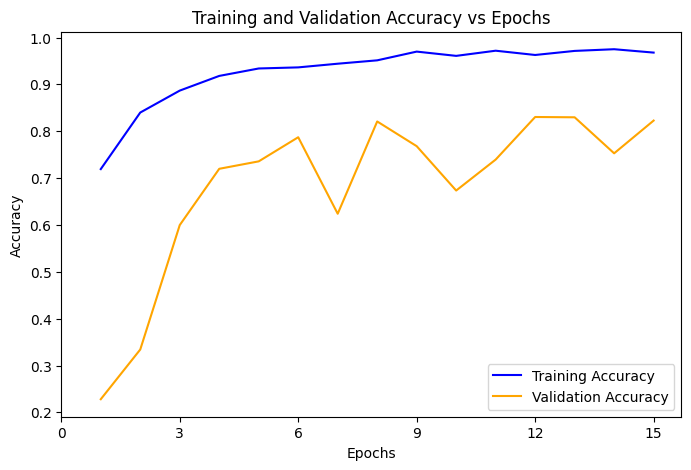

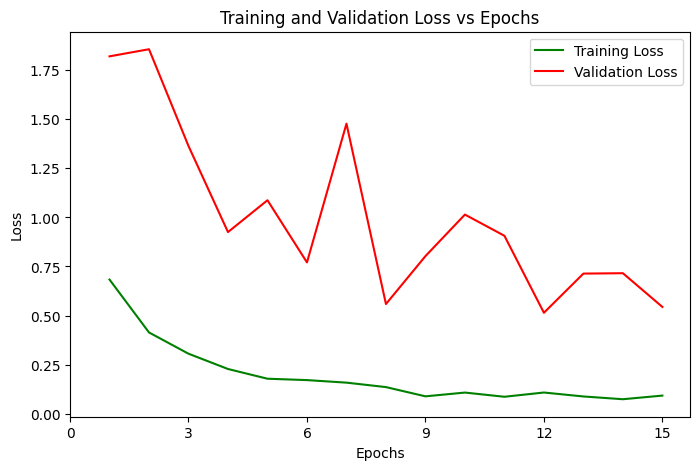

In [ ]:
# Plotting Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_accuracy_list, label='Training Accuracy', color='blue')
plt.plot(epoch_list, val_accuracy_list, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0,16, 3))
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epoch_list, train_loss_list, label='Training Loss', color='green')
plt.plot(epoch_list, val_loss_list, label='Validation Loss', color='red')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0,16, 3))
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate the model on the test set
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Store true and predicted labels for test set
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Compute test accuracy, precision, recall, and F1 score
test_accuracy = accuracy_score(true_labels, predicted_labels)
test_precision = precision_score(true_labels, predicted_labels, average='weighted')
test_recall = recall_score(true_labels, predicted_labels, average='weighted')
test_f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print test accuracy, precision, recall, and F1 score
print('Test Accuracy: %.4f, Precision: %.4f, Recall: %.4f, F1 Score: %.4f'
      % (test_accuracy, test_precision, test_recall, test_f1))

Test Accuracy: 0.8241, Precision: 0.8270, Recall: 0.8241, F1 Score: 0.8235


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y_pred = []
y_true = []

# iterate over test data
#for inputs, labels in test_loader:
for i, (images, labels) in enumerate(test_loader):
    images, labels = images.to(device), labels.to(device)

    model = model.to(device)
    output = model(images) # Feed Network

    output = (torch.max(torch.exp(output), 1)[1])
    output = output.data.cpu().numpy()

    y_pred.extend(output) # Save Prediction

    labels1 = labels.data.cpu().numpy()
    y_true.extend(labels1) # Save Trut

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

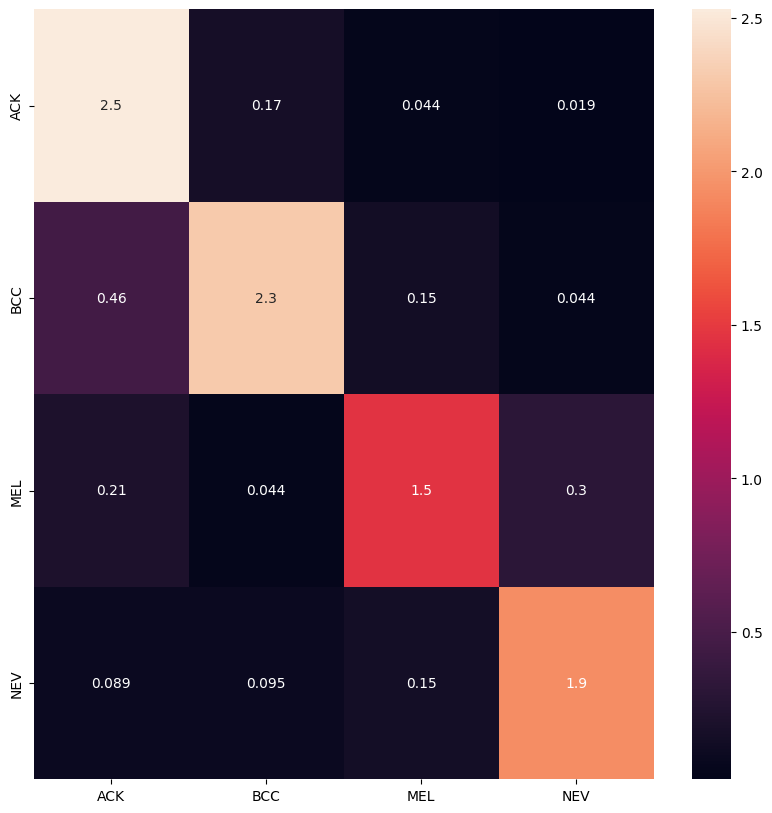

In [ ]:
import pandas as pd
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

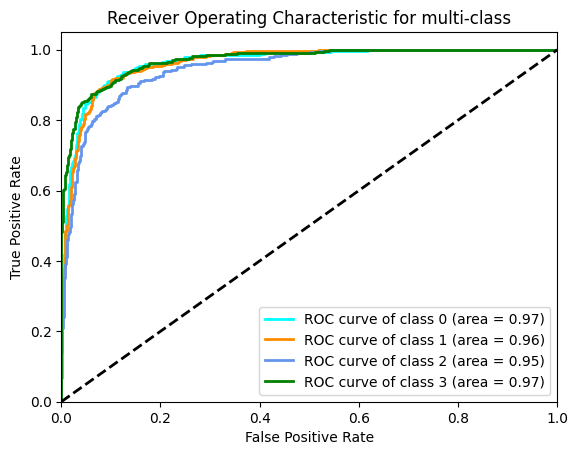

In [ ]:
import torch
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming 'model' is your neural network and 'test_loader' is your DataLoader for the test set.
# Also assuming 'num_classes' is the number of classes in your dataset.
num_classes=4

model.eval()  # Set the model to evaluation mode

# Collect all the labels and predictions for the test set
true_labels = []
pred_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)

        # Apply softmax to get probabilities
        probs = torch.nn.functional.softmax(outputs, dim=1)

        true_labels.append(labels.cpu().numpy())
        pred_probs.append(probs.cpu().numpy())

# Convert the true labels and predictions to a binary format
true_labels = label_binarize(np.concatenate(true_labels), classes=np.arange(num_classes))
pred_probs = np.concatenate(pred_probs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()